<a href="https://colab.research.google.com/github/jeongseobshin/python_study/blob/main/report_gaussian_sharpening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(328, 328)


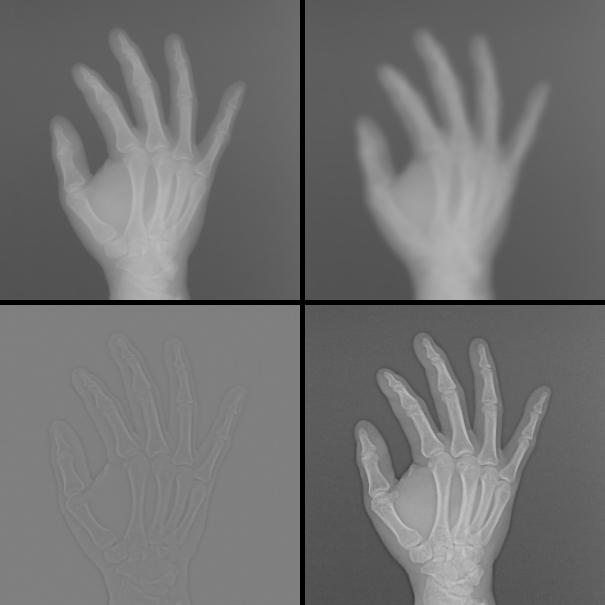

In [ ]:
#-*- coding: utf-8 -*- -#

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image=cv2.imread("/content/drive/MyDrive/python/data/의료영상데이타/hand.bmp", cv2.IMREAD_GRAYSCALE)

w=image.shape[1] #328
h=image.shape[0] #328

print(image.shape)

# gaussian smoothing
f_img = np.float32(image)
smooth = cv2.GaussianBlur(f_img, (15, 15), 0, 0) #표준편차

# smooth는 실수값을 가지므로 8비트 unsigned int 로 변환 후 display
smoothing = np.zeros((h,w), dtype=np.uint8)
smoothing = np.uint8(smooth)

# 차영상, uint8로 변환하여 보기
diff = f_img - smooth;
minus = np.uint8((diff+128))

# enhance 영상
sharp = f_img + 2 * diff
sharp = np.clip(sharp, 0, 255)
sharpen = np.uint8(sharp)

all = np.zeros((605,605), np.uint8)
image = cv2.resize(image,(300,300))
smoothing = cv2.resize(smoothing,(300,300))
minus = cv2.resize(minus,(300,300))
sharpen = cv2.resize(sharpen,(300,300))

all[0:300, 0:300] = image
all[0:300, 305:605] = smoothing
all[305:605, 0:300] = minus
all[305:605, 305:605] = sharpen

cv2_imshow(all)